In [1]:
import utils
from PIL import Image
import numpy as np
import os
import importlib
import time
import matplotlib.pyplot as plt

hii


In [2]:
def loadpic():
    files = []
    ups = []
    downs = []
    tests = os.listdir('./data/test/')
    for i in tests:
        files.append('./data/test/' + i)
    return files

In [3]:
files = loadpic()

In [4]:
files = np.array(files)
files

array(['./data/test/baboon.png', './data/test/baboon_down.png',
       './data/test/baboon_up.png', './data/test/F16.png',
       './data/test/F16_down.png', './data/test/F16_up.png',
       './data/test/flower.png', './data/test/flower_down.png',
       './data/test/flower_up.png', './data/test/lena.png',
       './data/test/lena_down.png', './data/test/lena_up.png',
       './data/test/Noisy.png', './data/test/peppers.png',
       './data/test/peppers_down.png', './data/test/peppers_up.png'],
      dtype='<U28')

In [5]:
ups = files[[2, 5, 11]]
downs = files[[1, 4, 10]]
oris = files[[0, 3, 9]]
ups, downs, oris

(array(['./data/test/baboon_up.png', './data/test/F16_up.png',
        './data/test/lena_up.png'], dtype='<U28'),
 array(['./data/test/baboon_down.png', './data/test/F16_down.png',
        './data/test/lena_down.png'], dtype='<U28'),
 array(['./data/test/baboon.png', './data/test/F16.png',
        './data/test/lena.png'], dtype='<U28'))

# P1

In [108]:
def p1(file):
    filters = utils.Pic_Filters()
    imgs = []
    for i in file:
        img = Image.open(i)
        imgs.append(np.array(img))
    
    hisbefore = []
    hisafter = []
    results = []
    for inputs in imgs:
        t = filters.global_histogram_equalization(inputs)
        results.append(t[0])
        hisbefore.append(t[1])
        hisafter.append(t[2])
    
    return results, hisbefore, hisafter

def p2(file):
    filters = utils.Pic_Filters()
    imgs = []
    for i in file:
        img = Image.open(i)
        imgs.append(np.array(img))
    
    imgArray = Image.open('./data/test/flower.png')
    imgArray = np.array(imgArray)
    
    his = []
    for inputs in imgs:
        t = filters.histogram_matching(inputs, imgArray)
        t = filters.extract_histogram(t)
        his.append(t)
    
    return his

In [103]:
results, hisbefore, hisafter = p1(downs)

In [112]:
his = p2(oris)

In [77]:
Image.fromarray(results[2]).save('./data/result/problem1/lena_down.png')

In [113]:
def hismake(inputs):
    fig, axs = plt.subplots(1, 3, figsize=(30, 10))
    for m, c in enumerate(inputs):
        data = []
        for i in range(len(c)):
            a = [i] * c[i]
            data = data + a
            
        ax = axs[m]
        n, bins, patches = ax.hist(data, bins='auto')
        ax.set_xlabel("pixel Values")
        ax.set_ylabel("Frequency")
        ax.set_xlim([0, 255])
    fig.tight_layout()
    return fig

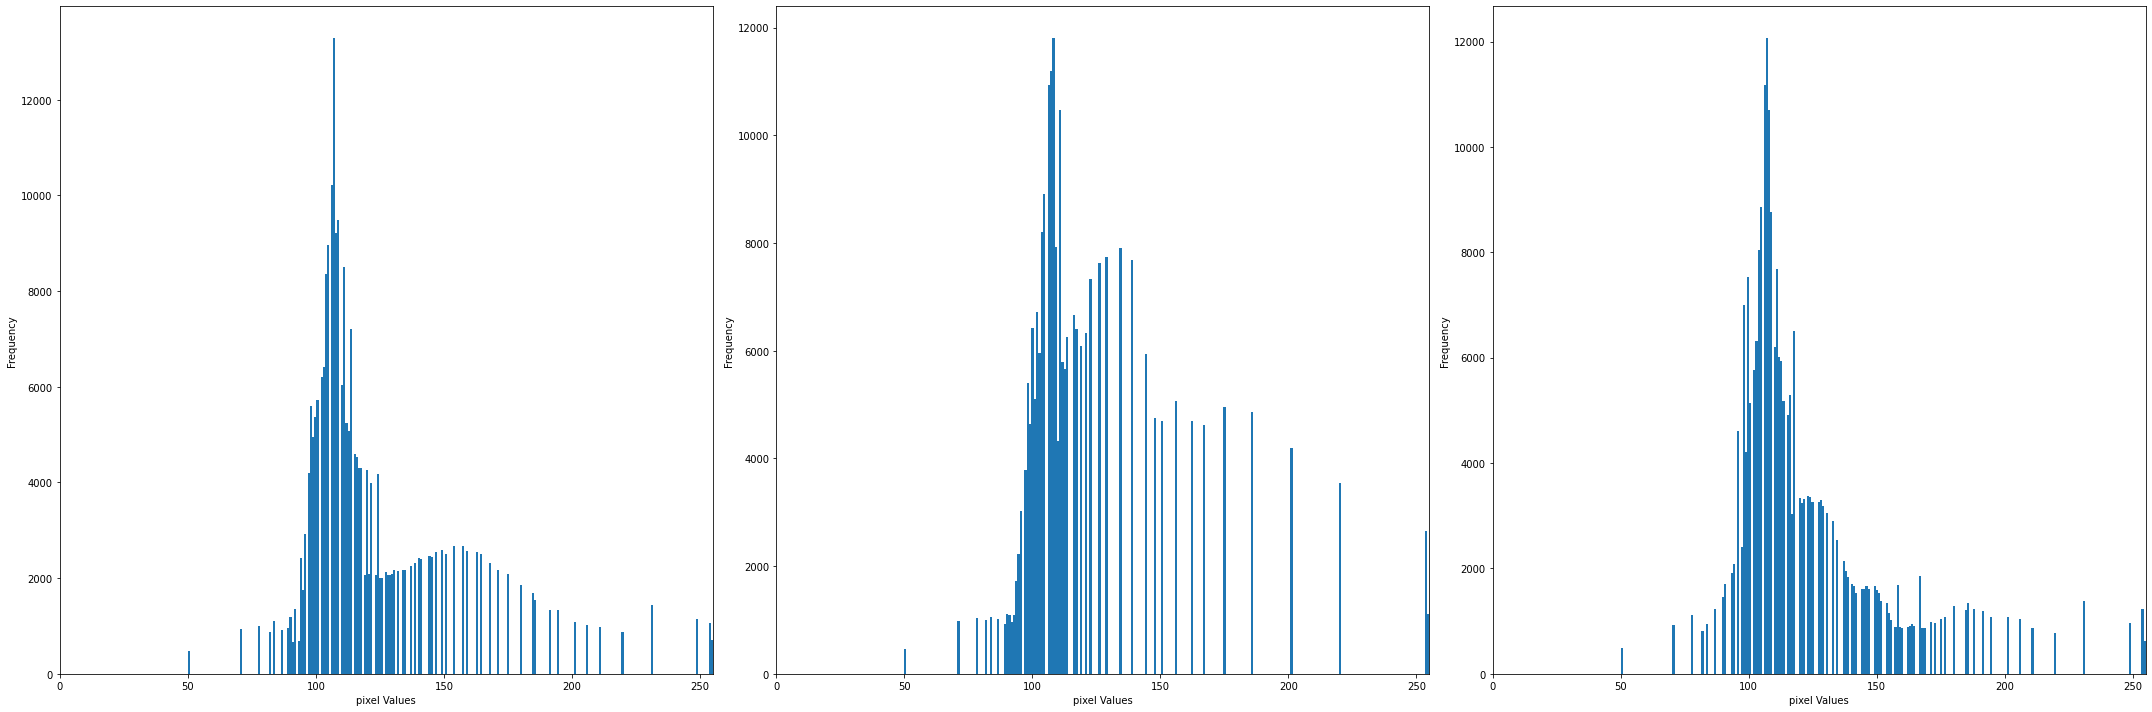

In [114]:
f = hismake(his)
f.savefig('./data/result/problem1/his_match.png')

# P2

In [22]:
importlib.reload(utils)
filters = utils.Pic_Filters()
ks = [3, 5, 7, 33]

inputs = oris
for p in oris:
    img = Image.open(p)
    img = np.array(img)
    name = p.split('/')[-1].split('.')[0]
    
    for k in ks:
        F = filters.average_filter(k)
        outputs = filters.conv(F, img)
        Image.fromarray(outputs.astype('uint8')).save('./data/result/problem2/average/{}_K{}.png'.format(name, str(k)))
#         break

hii


In [10]:
outputs

array([[-336., -167., -172., ..., -180., -173., -253.],
       [-168.,    1.,   -3., ...,   -8.,  -12., -115.],
       [-168.,    1.,   -3., ...,   -8.,  -12., -115.],
       ...,
       [ -60.,    4.,   -1., ...,   -5.,    8., -116.],
       [ -58.,   10.,  -15., ...,   -1.,   -5., -134.],
       [-118.,  -50.,  -79., ..., -119., -120., -251.]])

# p3

In [23]:
filters = utils.Pic_Filters()
nums = [1, 2]

inputs = oris
for p in oris:
    img = Image.open(p)
    img = np.array(img)
    name = p.split('/')[-1].split('.')[0]
    
    for num in nums:
        F = filters.filterP3(num=num)
        outputs = filters.conv(F, img)
        Image.fromarray(outputs.astype('uint8')).save('./data/result/problem3/kernel{}/{}.png'.format(str(num), name))

# P4

In [26]:
# filters = utils.Pic_Filters()

# inputs = oris
# for p in oris:
#     img = Image.open(p)
#     img = np.array(img)
#     name = p.split('/')[-1].split('.')[0]
#     outputs = filters.order_stat_filt(img, size=7, mode='median')
#     Image.fromarray(outputs.astype('uint8')).save('./data/result/problem4/{}.png'.format(name))